In [1]:
import time
import numpy as np
from numpy import ndarray
import cv2 as cv
import matplotlib.pyplot as plt
from typing import Tuple

## Exercise 1
Using numpy indexing implement a generic 2D convolution operation working on single channel inputs. Consider using both indexing and block matrix operations to compute the convolution output. Compare the runtime against the dimensions of the convolution filter, keeping the same image dimensions. Plot the result of the convolution on each channel using subfigures from matplotlib.

In [2]:
def generic_convolution(img: ndarray, conv_filter: ndarray, padding="none") -> ndarray:
    conv_size = conv_filter.shape[0]
    if padding == "zero":
        img = np.pad(img, (conv_size - 1,), "constant", constant_values=(0,))
    x = img.shape[0]
    y = img.shape[1]
    img_copy = img.copy()
    for i in range(x - conv_size):
        for j in range(y - conv_size):
             img_copy[i + conv_size//2, j + conv_size // 2] = np.sum(np.multiply(img[i:i + conv_size, j:j + conv_size], conv_filter))
    if padding == "zero":
        return img_copy[1:-1,1:-1]
    return img_copy

In [3]:
def get_image(img_path:str = "bender.png") -> ndarray:
    return cv.imread(img_path)

def get_img_color_channels(image: ndarray) -> Tuple[ndarray, ndarray, ndarray]:
    return image[:, :, 0], image[:, :, 1], image[:, :, 2]

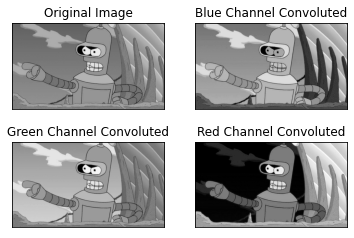

In [4]:
conv_filter = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
titles = ['Original Image', 'Blue Channel Convoluted', 'Green Channel Convoluted', 'Red Channel Convoluted']
img = get_image()
images = [cv.cvtColor(img, cv.COLOR_BGR2GRAY)] + [generic_convolution(x, conv_filter) for x in get_img_color_channels(get_image())]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
def time_convolution():
    debug = False
    indices = []
    times = []
    for i in range(2, 100):
        start = time.time()
        ok = generic_convolution(get_img_color_channels(get_image())[0], np.ones((i, i)))
        if debug:
            print(ok.shape)
        end = time.time()
        indices.append(i)
        times.append(end - start)
    return indices, times

once = False
if once:
    x, y = time_convolution()
    plt.title("Timing convolution processing time")
    plt.ylabel("Time(s)")
    plt.xlabel("Conv size")
    plt.scatter(x, y)
    plt.show()
    once = False

## Exercise 2
Using the generic convolution operation, implement different image gradients and different smoothing filters. Plot the filtered output against the image input. Why are the results becoming more/less sharp, after each filtering operation?

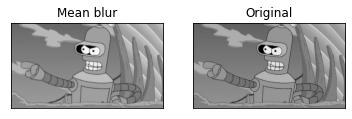

In [6]:
padding = "none"
img = cv.cvtColor(get_image(), cv.COLOR_BGR2GRAY)
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]), padding=padding),'gray')
plt.title("Mean blur")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

##### The result is less sharp because each pixel becomes the mean of the surrounding pixels

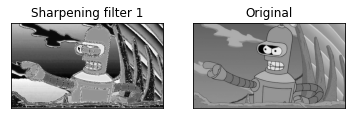

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[-1, -1, -1], [-1, 2, -1], [-1, -1, -1]]), padding=padding),'gray')
plt.title("Sharpening filter 1")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

##### The result is less sharp because each pixel would be accentuated while the neighboring pixels would be subtracted in order to accentuate the difference

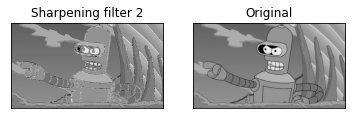

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]), padding=padding),'gray')
plt.title("Sharpening filter 2")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

##### The result is less sharp because each pixel would be accentuated while the neighboring pixels would be subtracted in order to accentuate the difference

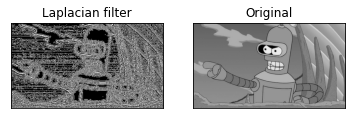

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]), padding=padding),'gray')
plt.title("Laplacian filter")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

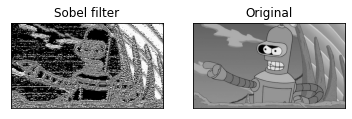

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), padding=padding),'gray')
plt.title("Sobel filter")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

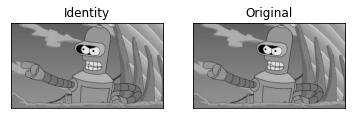

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(generic_convolution(img, np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), padding=padding),'gray')
plt.title("Identity")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img,'gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.show()

## Exercise 3
Given a noisy image, apply Otsu binarization on the noisy image and a gaussian filtered output of the same image. Discuss the results given the particularities of Otsu's algorithm. Discuss about the two phases of the iterative procedure, and how the procedure converges to the given solution.


In [12]:
def apply_otsu(image: ndarray) -> ndarray:
    return cv.threshold(image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]

def apply_gaussian_blur(image: ndarray) -> ndarray:
    return generic_convolution(image, np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]]))

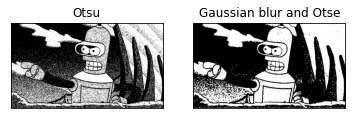

In [13]:
from skimage.util import random_noise
img = cv.cvtColor(get_image(), cv.COLOR_BGR2GRAY)
img = random_noise(img, mode='speckle')
img = np.array(255*img, dtype = 'uint8')
plt.subplot(1, 2, 1)
plt.imshow(apply_otsu(img),'gray')
plt.title("Otsu")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(apply_otsu(apply_gaussian_blur(img)),'gray')
plt.title("Gaussian blur and Otse")
plt.xticks([])
plt.yticks([])
plt.show()

We observe that thresholding is more pronounced after applying gaussian filter over the original noisy image.
Otsu's algorithm is designed such that it tries to minimize the within class variance. The Gaussian blurring helps by
removing some high frequency pixels in the image. Therefore, Otsu's method obtains a better segmentation.